<a href="https://www.kaggle.com/code/faris71/neural-network-from-scratch?scriptVersionId=259071578" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Sketch for the final GOAL



1.   Import the MNIST dataset
2.   Manage it.
3.   Divide it to 2 parts for training and testing.
4.   Initialize the values for X, W, and b\
5.   Then create functions for ReLU, softmax, forward prop
6.   Create the function for backprop, derivative of ReLU.
7.   Create the function for gradient decent, predictions and accuracy.



# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#from sklearn.utils import shuffle

# Dowloading the dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-in-csv


# Turning the csv into readable data frame

In [3]:
df = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")

# Reading the data frame

In [4]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Observing the shape of the data (i.e. number of rows and columns)

In [5]:
df.shape


(60000, 785)

# Observing the transpose of the first few data

In [6]:
df.head().T

,0,1,2,3,4
label,5,0,4,1,9
1x1,0,0,0,0,0
1x2,0,0,0,0,0
1x3,0,0,0,0,0
1x4,0,0,0,0,0
...,...,...,...,...,...
28x24,0,0,0,0,0
28x25,0,0,0,0,0
28x26,0,0,0,0,0
28x27,0,0,0,0,0


# Deviding the dataset into sets

In [7]:
data = np.array(df)
g, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
x_dev = data_dev[1:, ]
y_dev = data_dev[0, :]

data_train = data[1000:]
x_train = data_train[:, 1:].T #(784, c)
y_train = data_train[:, 0].T #(1, c)

#normalization of inputs
x_train = x_train.astype(np.float32) / 255.0
x_dev = x_dev.astype(np.float32) / 255.0


# Visualizing the Disparity of the dataset among classes from 0 to 10.

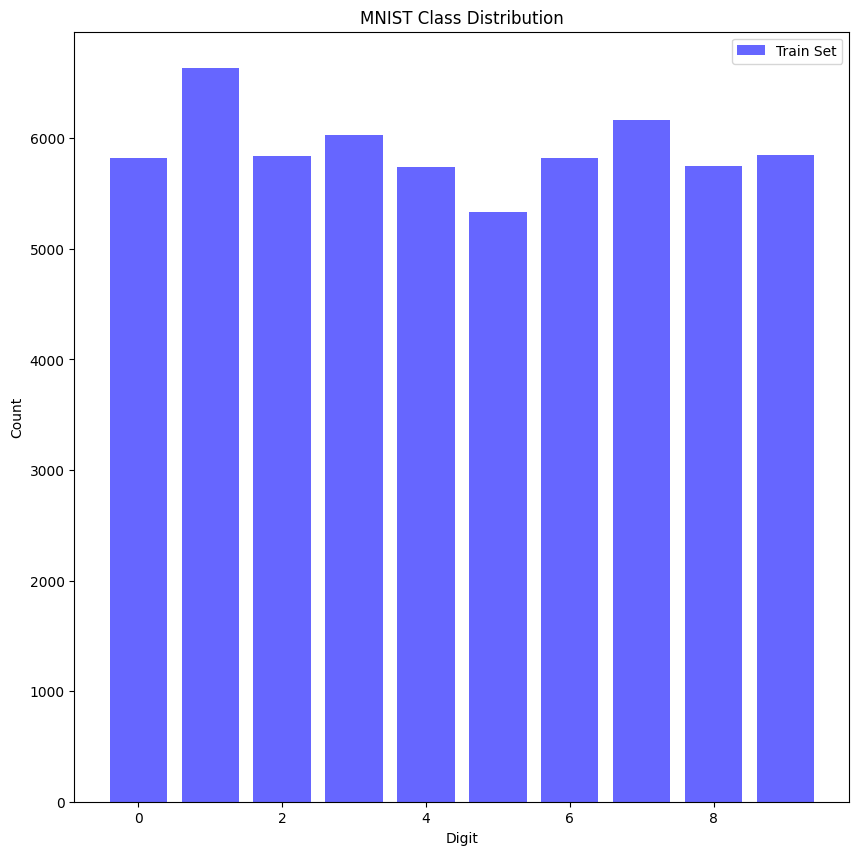

Training set class counts: [5824 6633 5845 6035 5740 5337 5821 6170 5746 5849]


In [8]:

import matplotlib.pyplot as plt

# Count occurrences of each class
train_counts = np.bincount(y_train)

# Plot class distribution
plt.figure(figsize=(10, 10))
plt.bar(range(10), train_counts, color='blue', alpha=0.6, label='Train Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('MNIST Class Distribution')
plt.legend()
plt.show()

# Print class counts
print("Training set class counts:", train_counts)


# Visualizing a single data as an image

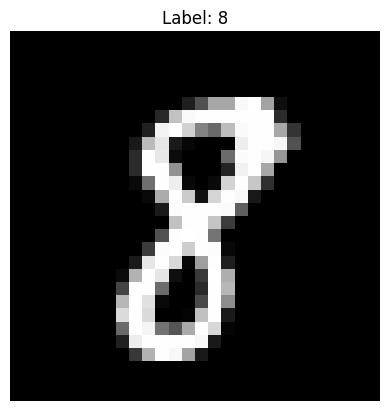

In [9]:
# A sample image
index = 0  # Change this to visualize a different image
image = x_train[:,index]
label = y_train[index]

# Ploting the image
image = image.reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()


# Shape of a single data

In [11]:
x_train[:,0].shape

(784,)

# Function to initialize the parameters with weights and biases for two layers# 

In [12]:
def init_param():
    w1 = (np.random.randn(128,784) * 0.01).astype(np.float32) #* np.sqrt(2.0 / 784)
    b1 = np.zeros((128, 1), dtype=np.float32)
    w2 = (np.random.randn(10, 128) * 0.01).astype(np.float32) #* np.sqrt(2.0 / 10)
    b2 = np.zeros((10, 1), dtype=np.float32)
    #X  = x_train # (784, c)
    #Y  = y_train # (1, c)
    #alpha = 0.01
    return w1, b1, w2, b2

# Function for the ReLU activation function --> max(0, x)

In [13]:
def relu(z):
    return np.maximum(z, 0)

# Function for softmax activation function

In [14]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

# Forward propagation.

In [15]:
def forward_prop(w1, b1, w2, b2, X):
    z1 = w1.dot(X) + b1 # (128, c)?
    a1 = relu(z1)
    z2 = w2.dot(a1) + b2 # (10, c)
    a2 = softmax(z2)
    return z1, a1, z2, a2

# Backpropagation

In [16]:
def back_prop(w1, b1, w2, b2, z1, a1, z2, a2, X, Y):
  m = X.shape[1]
  dz2 = a2 - Y
  dw2 = 1/m * dz2.dot(a1.T) #(10, 10)
  db2 = 1/m * np.sum(dz2, axis=1, keepdims=True)
  dz1 = w2.T.dot(dz2) * (z1 > 0)
  dw1 = 1/m * dz1.dot(X.T) #(10, 784)
  db1 = 1/m * np.sum(dz1, axis=1, keepdims=True)
  return dw1, db1, dw2, db2

# Updating the parameters during the gradient decent

In [17]:
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
  w1 = w1 - alpha * dw1
  b1 = b1 - alpha * db1
  w2 = w2 - alpha * dw2
  b2 = b2 - alpha * db2

  return w1, b1, w2, b2 #, alpha

# One hot encoding the Y labels

In [18]:
def one_hot_encoding(Y):
  one_hot_Y = np.zeros((Y.size, 10), dtype=np.float32)
  one_hot_Y[np.arange(Y.size), Y.astype(int)] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

# Function to find the predictions

In [19]:
def predictions(A2):
  return np.argmax(A2, 0) #(10, c)->(1, c)


# Function to calculate the accuracy

In [20]:
def accuracy(predictions, Y):
  #print(predictions, Y)
  return (np.sum(predictions == Y)/Y.size)

# Mini-Batch Gradient Descent (This is gradient descent used in this implementation.)

In [21]:
def compute_loss(a2, y_onehot):
    # a2: (10, m), y_onehot: (10, m)
    eps = 1e-12
    m = a2.shape[1]
    return -np.sum(y_onehot * np.log(a2 + eps)) / m

def train_minibatch(
    X, y, epochs=10, batch_size=128, lr=0.1, hidden=128,
    X_val=None, y_val=None, seed=42,
    w1=None, b1=None, w2=None, b2=None
    ):
    np.random.seed(seed)
    if w1 is None:
        w1, b1, w2, b2 = init_param()
    
    m = X.shape[1]
    idx = np.arange(m)
    
    for ep in range(1, epochs + 1):
        np.random.shuffle(idx)
        X = X[:, idx]
        y = y[idx]
    
        total_loss = 0.0
        seen = 0
    
        for start in range(0, m, batch_size):
            end = min(start + batch_size, m)
            Xb = X[:, start:end]                  # (784, b)
            yb = y[start:end]                     # (b,)
            yb_oh = one_hot_encoding(yb)          # (10, b)
    
            z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, Xb)
            loss = compute_loss(a2, yb_oh)
    
            dw1, db1, dw2, db2 = back_prop(w1, b1, w2, b2, z1, a1, z2, a2, Xb, yb_oh)
            w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, lr)
    
            total_loss += loss * (end - start)
            seen += (end - start)
    
        # metrics per epoch
        _, _, _, a2_tr = forward_prop(w1, b1, w2, b2, X)
        acc_tr = np.mean(predictions(a2_tr) == y)
        msg = f"epoch {ep:02d}  loss={total_loss/seen:.4f}  acc={acc_tr:.4f}"
    
        if X_val is not None and y_val is not None:
            _, _, _, a2_val = forward_prop(w1, b1, w2, b2, X_val)
            acc_val = np.mean(predictions(a2_val) == y_val)
            msg += f"  val_acc={acc_val:.4f}"
    
        print(msg)
    
    return w1, b1, w2, b2

# Function for the SGD gradient descent (Not used)

In [22]:
def gradient_descent( x, y, iterations, alpha, decay_rate, w1, b1, w2, b2, r=False):
  if r == False:
    w1, b1, w2, b2 = init_param()
  for i in range(1, iterations+1):
    for j in range(x.shape[1]):
      X = x[:,j:j+1]
      Y = y[j:j+1]
      one_hot_Y = one_hot_encoding(Y)
      z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)
      dw1, db1, dw2, db2 = back_prop(w1, b1, w2, b2, z1, a1, z2, a2, X, one_hot_Y)
      w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
      ''' # Custome learning rate (unsafe)
      if alpha > 0.0001:
        alpha = alpha - decay_rate # best for this 0.0001'''
      '''# time based exponential learning rate
      alpha = initial_alpha / np.exp(-decay_rate * i)'''
      '''# time based standard learning rate
      alpha = initial_alpha / (1 + decay_rate * i)'''
      # Step Decay (got the highes accuracy of 79% with (0.01, 0.001))
      #if i+1 % 50 == 0:
       # alpha = initial_alpha - 0.005
    if (i%10 == 0):
      #print("iteration number: ", i)
      _, _, _, a2_full = forward_prop(w1, b1, w2, b2, x)
      acc = accuracy(predictions(a2_full), y)
      print(f"iteration number: {i} train acc: {acc:.4f}")

  return w1, b1, w2, b2


# Training using mini batch gradient descent

In [23]:
w1, b1, w2, b2 = train_minibatch(
X=x_train, y=y_train,
epochs=10, batch_size=128, lr=0.1,
X_val=x_dev, y_val=y_dev, seed=42
)
#Evaluate:
_, _, _, a2_tr = forward_prop(w1, b1, w2, b2, x_train)
print("Final train acc:", np.mean(predictions(a2_tr) == y_train))
_, _, _, a2_dv = forward_prop(w1, b1, w2, b2, x_dev)
print("Final dev acc:", np.mean(predictions(a2_dv) == y_dev))

epoch 01  loss=0.7709  acc=0.8997  val_acc=0.9020
epoch 02  loss=0.3153  acc=0.9199  val_acc=0.9140
epoch 03  loss=0.2638  acc=0.9329  val_acc=0.9280
epoch 04  loss=0.2261  acc=0.9420  val_acc=0.9380
epoch 05  loss=0.1964  acc=0.9502  val_acc=0.9460
epoch 06  loss=0.1731  acc=0.9553  val_acc=0.9530
epoch 07  loss=0.1550  acc=0.9594  val_acc=0.9570
epoch 08  loss=0.1401  acc=0.9630  val_acc=0.9560
epoch 09  loss=0.1279  acc=0.9669  val_acc=0.9640
epoch 10  loss=0.1174  acc=0.9687  val_acc=0.9640
Final train acc: 0.9687457627118644
Final dev acc: 0.964


In [25]:
# forward on all training data
_, _, _, a2_all = forward_prop(w1, b1, w2, b2, x_train)  # x_train: (784, m)
preds = predictions(a2_all)                              # shape (m,)
acc = np.mean(preds == y_train)                          # y_train: shape (m,)
print("Train accuracy:", acc)

Train accuracy: 0.9687457627118644


# Testing the prediction of a single data

Pred: 8, True: 8, Correct? True, Confidence: 0.9853


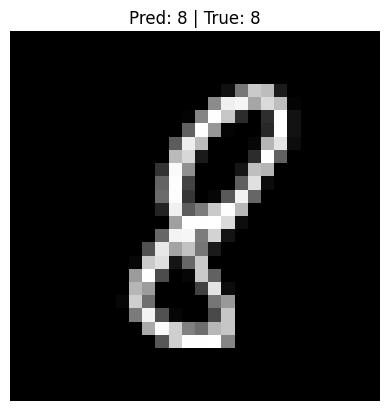

In [33]:
# pick an index from the dev set
idx = 99  # change as you like

# prepare sample (keep 2D)
x_sample = x_dev[:, idx:idx+1]       # (784, 1)
y_true = int(y_dev[idx])

# forward + predict
_, _, _, a2 = forward_prop(w1, b1, w2, b2, x_sample)
y_pred = int(predictions(a2)[0])
conf = float(a2[y_pred, 0])          # softmax confidence

print(f"Pred: {y_pred}, True: {y_true}, Correct? {y_pred == y_true}, Confidence: {conf:.4f}")

# optional: visualize
plt.imshow(x_sample.reshape(28, 28), cmap='gray')
plt.title(f'Pred: {y_pred} | True: {y_true}')
plt.axis('off'); plt.show()